In [2]:
import pandas as pd
import os
import io
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from google.colab import files
import csv
import keras
from keras.datasets import mnist
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white-training.csv to winequality-white-training.csv


In [0]:
#Code to make mesh grid, found at:
#https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [4]:
#Load in CSV
training_df = pd.read_csv(io.StringIO(uploaded['winequality-white-training.csv'].decode('utf-8')))
training_df.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.7,0.23,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,7
1,1,5.0,0.27,0.40,1.2,0.076,42.0,124.0,0.99204,3.32,0.47,10.1,6
2,2,8.0,0.16,0.36,1.5,0.033,14.0,122.0,0.99410,3.20,0.39,10.3,4
3,3,5.8,0.28,0.35,2.3,0.053,36.0,114.0,0.99240,3.28,0.50,10.2,4
4,4,7.1,0.14,0.33,1.0,0.104,20.0,54.0,0.99057,3.19,0.64,11.5,6


In [0]:
Y = training_df[['quality']].values
X = training_df.drop(['quality', 'Id'], axis=1).values
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.33, random_state=42)

In [0]:
def TestModel(batchSize, epochs, layers, activation):
  model = Sequential()
  for layerCount in layers:
    model.add(Dense(units=int(layerCount), activation=activation, input_shape=(11,))) 
#   model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
  model.add(Dense(units=1, activation='linear'))
  model.summary()

  model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])
  history = model.fit(xTrain, yTrain, batch_size=batchSize, epochs=epochs, verbose=False, validation_split=.1)
  loss, accuracy  = model.evaluate(xTest, yTest, verbose=False)

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['training', 'validation'], loc='best')
  axes = plt.gca()
  axes.set_ylim([0,1])
  plt.show()

  print(f'Test loss: {loss:.3}')
  
  return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_289 (Dense)            (None, 50)                600       
_________________________________________________________________
dense_290 (Dense)            (None, 45)                2295      
_________________________________________________________________
dense_291 (Dense)            (None, 40)                1840      
_________________________________________________________________
dense_292 (Dense)            (None, 35)                1435      
_________________________________________________________________
dense_293 (Dense)            (None, 30)                1080      
_________________________________________________________________
dense_294 (Dense)            (None, 25)                775       
_________________________________________________________________
dense_295 (Dense)            (None, 20)                520       
__________

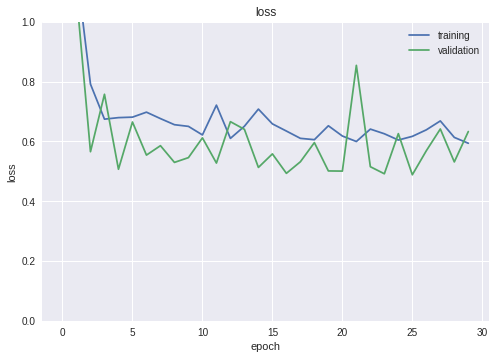

Test loss: 0.699


In [179]:
myModel = TestModel(16, 30, [75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5], 'relu')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_316 (Dense)            (None, 2000)              24000     
_________________________________________________________________
dense_317 (Dense)            (None, 500)               1000500   
_________________________________________________________________
dense_318 (Dense)            (None, 50)                25050     
_________________________________________________________________
dense_319 (Dense)            (None, 1)                 51        
Total params: 1,049,601
Trainable params: 1,049,601
Non-trainable params: 0
_________________________________________________________________


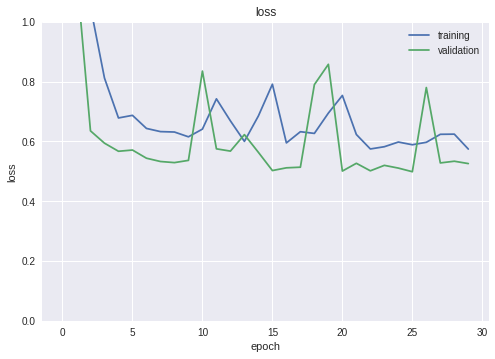

Test loss: 0.588


In [184]:
myModel = TestModel(128, 30, [2000, 500, 50], 'relu')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_347 (Dense)            (None, 2000)              24000     
_________________________________________________________________
dense_348 (Dense)            (None, 1000)              2001000   
_________________________________________________________________
dense_349 (Dense)            (None, 500)               500500    
_________________________________________________________________
dense_350 (Dense)            (None, 250)               125250    
_________________________________________________________________
dense_351 (Dense)            (None, 50)                12550     
_________________________________________________________________
dense_352 (Dense)            (None, 1)                 51        
Total params: 2,663,351
Trainable params: 2,663,351
Non-trainable params: 0
_________________________________________________________________


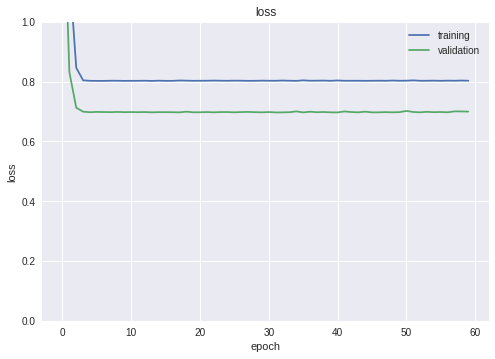

Test loss: 0.757


In [192]:
myModel = TestModel(64, 60, [2000, 500, 250, 50], 'sigmoid')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_382 (Dense)            (None, 2000)              24000     
_________________________________________________________________
dense_383 (Dense)            (None, 500)               1000500   
_________________________________________________________________
dense_384 (Dense)            (None, 50)                25050     
_________________________________________________________________
dense_385 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_386 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_387 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_388 (Dense)            (None, 50)                2550      
__________

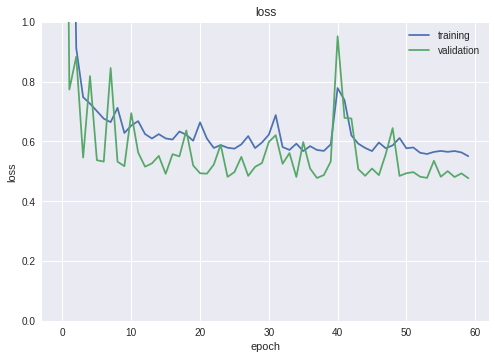

Test loss: 0.552


In [195]:
myModel = TestModel(64, 60, [2000, 500, 50, 50, 50, 50, 50, 50, 50, 20, 20, 20, 20, 10], 'relu')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5000)              60000     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               2500500   
_________________________________________________________________
dense_3 (Dense)              (None, 50)                25050     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
__________

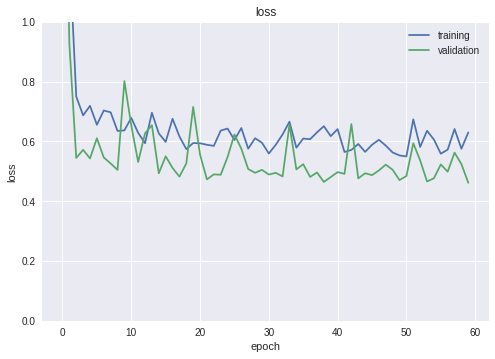

Test loss: 0.559


In [8]:
myModel = TestModel(64, 60, [5000, 2000, 500, 50, 50, 50, 50, 50, 50, 50, 20, 20, 20, 20, 10], 'relu')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 5000)              60000     
_________________________________________________________________
dense_17 (Dense)             (None, 2000)              10002000  
_________________________________________________________________
dense_18 (Dense)             (None, 500)               1000500   
_________________________________________________________________
dense_19 (Dense)             (None, 50)                25050     
_________________________________________________________________
dense_20 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_21 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_22 (Dense)             (None, 50)                2550      
__________

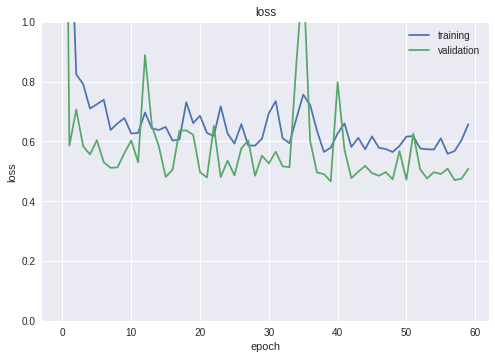

Test loss: 0.581


In [9]:
myModel = TestModel(64, 60, [5000, 2000, 500, 50, 50, 50, 50, 50, 50, 50, 20, 20, 20, 20, 10], 'relu')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 2000)              24000     
_________________________________________________________________
dense_51 (Dense)             (None, 500)               1000500   
_________________________________________________________________
dense_52 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_53 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_54 (Dense)             (None, 70)                7070      
_________________________________________________________________
dense_55 (Dense)             (None, 50)                3550      
_________________________________________________________________
dense_56 (Dense)             (None, 50)                2550      
__________

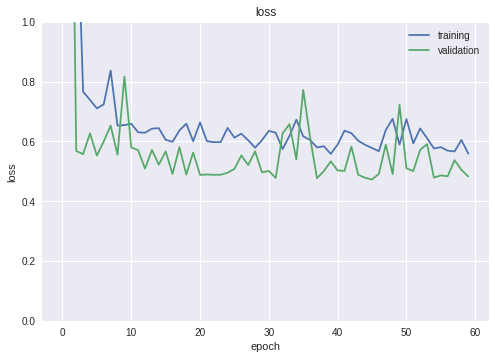

Test loss: 0.548


In [11]:
myModel = TestModel(64, 60, [2000, 500, 100, 100, 70, 50, 50, 50, 50, 50, 50, 50, 20, 20, 20, 20, 10], 'relu')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 2000)              24000     
_________________________________________________________________
dense_74 (Dense)             (None, 50)                100050    
_________________________________________________________________
dense_75 (Dense)             (None, 500)               25500     
_________________________________________________________________
dense_76 (Dense)             (None, 20)                10020     
_________________________________________________________________
dense_77 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 11        
Total params: 159,791
Trainable params: 159,791
Non-trainable params: 0
_________________________________________________________________


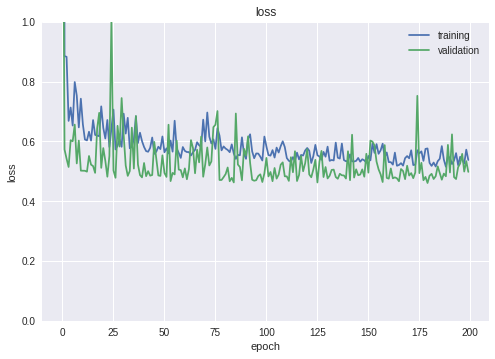

Test loss: 0.555


In [19]:
myModel = TestModel(64, 200, [2000, 50, 500, 20, 10], 'relu')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 2000)              24000     
_________________________________________________________________
dense_104 (Dense)            (None, 50)                100050    
_________________________________________________________________
dense_105 (Dense)            (None, 20)                1020      
_________________________________________________________________
dense_106 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 11        
Total params: 125,291
Trainable params: 125,291
Non-trainable params: 0
_________________________________________________________________


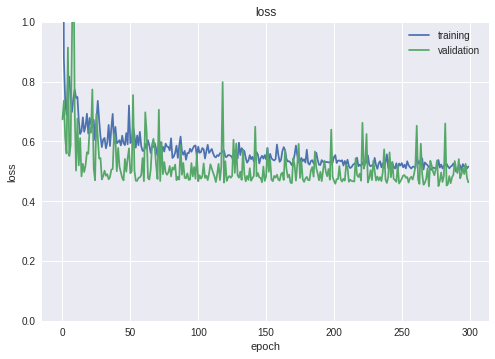

Test loss: 0.541


In [24]:
myModel = TestModel(32, 300, [2000, 50, 20, 10], 'relu')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 2000)              24000     
_________________________________________________________________
dense_113 (Dense)            (None, 200)               400200    
_________________________________________________________________
dense_114 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_115 (Dense)            (None, 75)                7575      
_________________________________________________________________
dense_116 (Dense)            (None, 50)                3800      
_________________________________________________________________
dense_117 (Dense)            (None, 20)                1020      
_________________________________________________________________
dense_118 (Dense)            (None, 1)                 21        
Total para

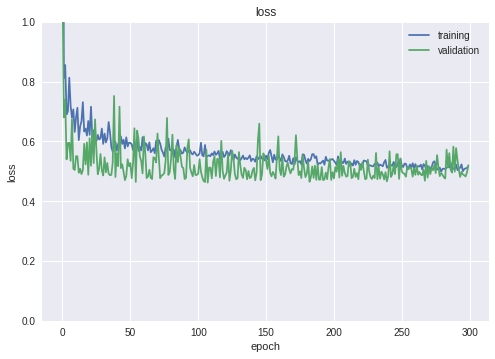

Test loss: 0.659


In [26]:
myModel = TestModel(16, 300, [2000, 200, 100, 75, 50, 20], 'relu')

In [12]:
prediction = myModel.predict(np.array(xTest))
# predictionRounded = [[round(singlePrediction)] for singlePrediction in [value[0] for value in prediction]]
mse = ((prediction - yTest)**2).mean(axis=0)
print(mse)
# mse = ((predictionRounded - yTest)**2).mean(axis=0)
# print(mse)

[0.5480436]


In [14]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white-testing.csv to winequality-white-testing.csv
Saving winequality-white-training.csv to winequality-white-training (1).csv


In [15]:
#Load in CSV
testing_df = pd.read_csv(io.StringIO(uploaded['winequality-white-testing.csv'].decode('utf-8')))
testing_df.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.0,0.310,0.31,9.1,0.036,45.0,140.0,0.99216,2.98,0.31,12.0
1,1,7.3,0.155,0.49,1.3,0.039,34.0,136.0,0.99260,3.14,0.77,10.5
2,2,6.0,0.260,0.24,1.3,0.053,66.0,150.0,0.99240,3.21,0.62,10.4
3,3,6.6,0.180,0.26,17.3,0.051,17.0,149.0,0.99840,3.00,0.43,9.4
4,4,6.2,0.290,0.26,13.1,0.046,55.0,204.0,0.99745,3.16,0.41,9.6


In [16]:
testValues = testing_df.drop(['Id'], axis=1).values
yPredictions = myModel.predict(np.array(testValues))
print(yPredictions)

[[6.567458 ]
 [6.122621 ]
 [5.904865 ]
 [5.595011 ]
 [5.6933293]
 [6.696631 ]
 [5.6423116]
 [5.023805 ]
 [4.839051 ]
 [5.804929 ]
 [5.828963 ]
 [6.3730845]
 [5.453029 ]
 [6.168508 ]
 [4.9861903]
 [5.6045933]
 [5.546331 ]
 [6.824924 ]
 [5.5387993]
 [6.143401 ]
 [6.863857 ]
 [7.0494137]
 [6.1751266]
 [6.7896085]
 [5.6822963]
 [5.2935796]
 [5.507602 ]
 [5.4252152]
 [6.3162   ]
 [5.638065 ]
 [5.8559937]
 [5.4640718]
 [6.2536006]
 [5.7139745]
 [6.8967614]
 [5.5923114]
 [5.218227 ]
 [5.540215 ]
 [6.322826 ]
 [5.4868054]
 [6.134582 ]
 [5.417021 ]
 [6.172231 ]
 [5.4075093]
 [5.663104 ]
 [6.56029  ]
 [5.856668 ]
 [5.918261 ]
 [6.3494096]
 [5.564282 ]
 [5.4134984]
 [6.1853213]
 [5.4610763]
 [7.126156 ]
 [4.8659186]
 [5.889686 ]
 [5.4840865]
 [5.8742013]
 [5.5721145]
 [5.7223287]
 [5.9649997]
 [6.3075337]
 [6.411061 ]
 [6.421519 ]
 [5.701979 ]
 [5.503649 ]
 [6.200314 ]
 [6.620066 ]
 [6.002128 ]
 [7.0266585]
 [5.7788467]
 [5.614944 ]
 [6.543463 ]
 [5.267099 ]
 [5.465428 ]
 [5.835718 ]
 [5.438196 ]

In [0]:
with open("Wine Predictions.csv", "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerows(yPredictions)
files.download("Wine Predictions.csv")